##Group 15

Arnold Kulundu -104896

Adam Boru - 113229

Gideon Longishu - 111356

Melvin Ngure - 110497

# Project Description
This is an image proceesing Artificial Neural Network. The ANN is a multiclass classification model which is supposed to classify between a range of ten clothing items. The dataset is imported from keras(link to dataset: https://keras.io/api/datasets/fashion_mnist/). The model uses Keras library to compile and train the model. The model is a sequential model which leverages the keras sequential api.

#Libraries

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pydot
from keras.models import Sequential
from keras.layers import Dense,Flatten

# Data upload

In [2]:
data = keras.datasets.fashion_mnist

The data contains over 70,000 images of clothing items which are 

#Data Preprocessing

In [3]:
#Train-test data split

(x_train_full,y_train_full),(x_test,y_test) = data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
len(x_train_full)

60000

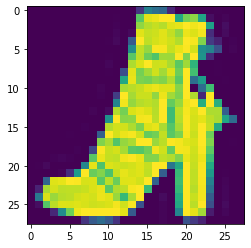

In [5]:
plt.imshow(x_train_full[11])

In [6]:
# The class_name list is a list of the labels in the dataset arranged in the order they are respectively in the dataset
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
y_train_full[11]

9

In [8]:
class_name[y_train_full[11]]

'Ankle boot'

In [9]:
x_train_full[11]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  39, 111,  93,  85,  27,   0,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0, 190, 244, 248, 255, 255, 155, 202, 212, 150,   9,   0,   3,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0, 213, 227, 233, 227, 243, 246, 255, 250, 255, 146,   0,   9,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
          6, 244, 233, 236, 244, 232, 214, 248, 242, 251,  33,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   6,   0,
         72, 255, 231, 239, 244, 237, 226, 255, 252, 207,  44,  24,   0,
          2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        125, 231, 215, 253, 252, 234, 246, 254, 239, 128, 114,  63,   0,
          3,   0],
       [  

In [10]:
# Normalization -  The data is normalised to fit all images onto the same scale (divided by 255.0 to return a floating point number)

x_train_n = x_train_full/255.0
x_test_n = x_test/255.0 

In [11]:
# Splitting the data further to add a validation set
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

# Model Training and compiling

In [12]:
model = Sequential()
model.add(Flatten(input_shape = [28,28]))
model.add(Dense(300,activation="relu"))# Rectified Linear Unit(relu) is used to introduce non-linearity
model.add(Dense(200,activation="relu"))
model.add(Dense(10,activation="softmax")) #Softmax is used at the output layer for a neural network


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


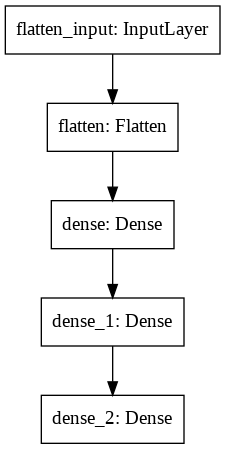

In [14]:
#Using Keras utils Library to show a diagramatic representation of the Model
keras.utils.plot_model(model)

In [15]:
# The weights and  biases of the input can be gotten using get_weights()
weights, biases = model.layers[1].get_weights()

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

In [18]:
#Setting up the learning processes
# The y-varible has more than two labels hence sparse categorical crossentropy is used
# Stochastic Gradient Descent is the optimiser
# The metrics used for a classifier is accuracy(MSE for regression)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
# Training the model
# IPmodel = Image processing model
IPmodel = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7135 - accuracy: 0.7688 - val_loss: 0.5040 - val_accuracy: 0.8264
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4865 - accuracy: 0.8300 - val_loss: 0.4486 - val_accuracy: 0.8380
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4406 - accuracy: 0.8460 - val_loss: 0.4329 - val_accuracy: 0.8568
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4140 - accuracy: 0.8559 - val_loss: 0.3888 - val_accuracy: 0.8658
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3937 - accuracy: 0.8623 - val_loss: 0.3816 - val_accuracy: 0.8680
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3780 - accuracy: 0.8667 - val_loss: 0.3783 - val_accuracy: 0.8720
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3655 - accuracy: 0.8701 - val_loss: 0.3773 - val_accuracy:

#Model Evaluation and Testing

In [20]:
IPmodel.params

{'epochs': 50, 'steps': 1719, 'verbose': 1}

In [21]:
IPmodel.history

{'accuracy': [0.768818199634552,
  0.829981803894043,
  0.8460000157356262,
  0.8558545708656311,
  0.8622545599937439,
  0.8666909337043762,
  0.8701090812683105,
  0.8751817941665649,
  0.8782363533973694,
  0.8812000155448914,
  0.8839818239212036,
  0.8869090676307678,
  0.8884727358818054,
  0.8905454277992249,
  0.8938363790512085,
  0.8954545259475708,
  0.8980363607406616,
  0.8999817967414856,
  0.9016727209091187,
  0.902363657951355,
  0.9052363634109497,
  0.9064000248908997,
  0.907909095287323,
  0.9112908840179443,
  0.9114363789558411,
  0.9131454825401306,
  0.9149090647697449,
  0.9155454635620117,
  0.9175636172294617,
  0.9191636443138123,
  0.9207636117935181,
  0.9209091067314148,
  0.9223818182945251,
  0.9247636198997498,
  0.9256181716918945,
  0.9272181987762451,
  0.9282909035682678,
  0.9290545582771301,
  0.9308545589447021,
  0.9310545325279236,
  0.9317454695701599,
  0.9337454438209534,
  0.9349818229675293,
  0.9353818297386169,
  0.9371272921562195,
  

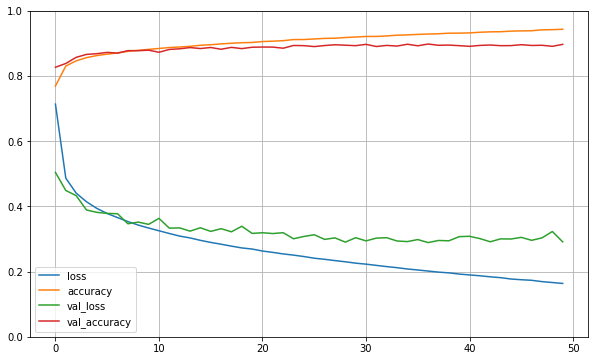

In [32]:
# Using pandas library to put the history of models accuracy in to a format that can be plotted on a graph
# Using matlpotlib.pyplot to plot the points on a graph
pd.DataFrame(IPmodel.history).plot(figsize=[10,6])
plt.grid(True)
plt.gca().set_ylim(0, 1)
#The diagram shows the way the model learned from the train set through every epoch 
plt.show()

In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3178 - accuracy: 0.8917


[0.3177573084831238, 0.891700029373169]

In [24]:
# Picking a group of items in the test set for model prediction
x_new = x_test[20:24]

In [25]:
#
y_probability = model.predict(x_new)
# returns the results rounded off to 2 decimal places
y_probability.round(2)

array([[0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
#This is used to find the unique ID of the classes being predicted
y_prediction = np.argmax(y_probability,axis=1)
y_prediction

array([2, 5, 7, 5])

In [27]:
# np is used to loop throught the array to show the class names of the predicted labels
np.array(class_name)[y_prediction]

array(['Pullover', 'Sandal', 'Sneaker', 'Sandal'], dtype='<U11')

#Test Verification
This part is done to show whether the model did infact predict the right image. Pyplot imshow() function is used to show the images in the test set for verification.

AxesImage(54,36;334.8x217.44)


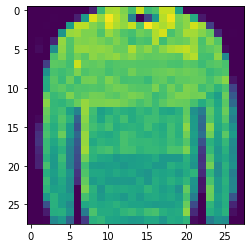

In [28]:
print(plt.imshow(x_test[20]))

AxesImage(54,36;334.8x217.44)


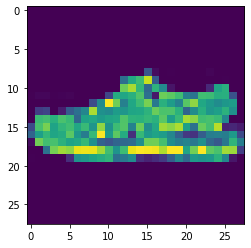

In [29]:
print(plt.imshow(x_test[21]))

AxesImage(54,36;334.8x217.44)


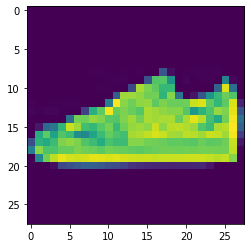

In [31]:
print(plt.imshow(x_test[22]))